In [6]:
## Test xitorch vs my newton

import torch
torch.set_default_dtype(torch.float64)

from torchspace.rambo import Rambo, RamboOnDiet
import time
from torchspace.functional.kinematics import lsquare, mass, boost, esquare
from math import pi
DEFAULT_FLOAT = torch.get_default_dtype()
EPS = torch.finfo(DEFAULT_FLOAT).eps

## Rambo phase-space (non-invertible)

In [7]:
e_cm = torch.tensor(500.).unsqueeze(0)
nparticles = 4
MW = 80.377
masses = [MW, MW, MW, 0.0]
rambo = Rambo(nparticles, masses=masses)

In [8]:
n = int(1)
r = torch.rand((n, 4* nparticles)).requires_grad_()
start_time = time.time()
(p,), weight = rambo.map([r, e_cm])
print("--- %s seconds ---\n" % (time.time() - start_time))

print(p)
print(mass(p))

--- 0.003982067108154297 seconds ---

tensor([[[ 250.0000,    0.0000,    0.0000,  250.0000],
         [ 250.0000,    0.0000,    0.0000, -250.0000],
         [ 155.6465,   76.4384,   85.3215,  -68.1380],
         [ 160.1995,    4.8000,  -48.7152,  129.6426],
         [  82.7689,  -18.0738,    2.1730,    7.6714],
         [ 101.3850,  -63.1645,  -38.7794,  -69.1760]]],
       grad_fn=<CatBackward0>)
tensor([[0.0000e+00, 0.0000e+00, 8.0377e+01, 8.0377e+01, 8.0377e+01, 1.9073e-06]],
       grad_fn=<SqrtBackward0>)


In [9]:
Lp = p.sum()
start_time = time.time()
Lp.backward(retain_graph=True)
print("--- %s seconds ---\n" % (time.time() - start_time))
rg = r.grad
print(rg.shape)

--- 0.02300286293029785 seconds ---

torch.Size([1, 16])


## Rambo on Diet (invertible map)

In [10]:
e_cm = torch.tensor(500.)
nparticles = 3
MW = 80.377
masses = [MW, MW, MW]
rambo = RamboOnDiet(nparticles, masses=masses)

In [11]:
n = int(1e6)
r = torch.rand((n, 3* nparticles-4)).requires_grad_()
start_time = time.time()
(p,), weight = rambo.map([r, e_cm])
print("--- %s seconds ---\n" % (time.time() - start_time))

# print(p)
# print(mass(p))

IndexError: too many indices for tensor of dimension 0

In [ ]:
Lp = p.sum()
start_time = time.time()
Lp.backward(retain_graph=True)
print("--- %s seconds ---\n" % (time.time() - start_time))
rg = r.grad

--- 1.498511791229248 seconds ---



In [ ]:
start_time = time.time()
(r2, e_cm2), weight_2 = rambo.map_inverse([p])
print("--- %s seconds ---\n" % (time.time() - start_time))

# print(r)
# print(r2)
accuracy, _ = torch.max(torch.log10(torch.abs(1-r/r2).clamp_min_(EPS)),dim=1)

--- 0.6065700054168701 seconds ---



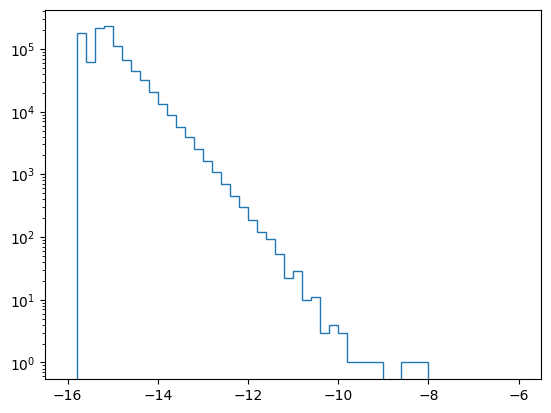

In [ ]:
import matplotlib.pyplot as plt
plt.hist(accuracy.detach(), bins=50, range=(-16,-6), histtype="step")
plt.yscale("log")
plt.show()